In [ ]:
#Swapnil Saha Shawon (2022533042)
#Tamanna Rahman (2021450642)
#Syeda Mashiat Tabassum (2031356642)

# Air Quality



### Multivariate linear regression

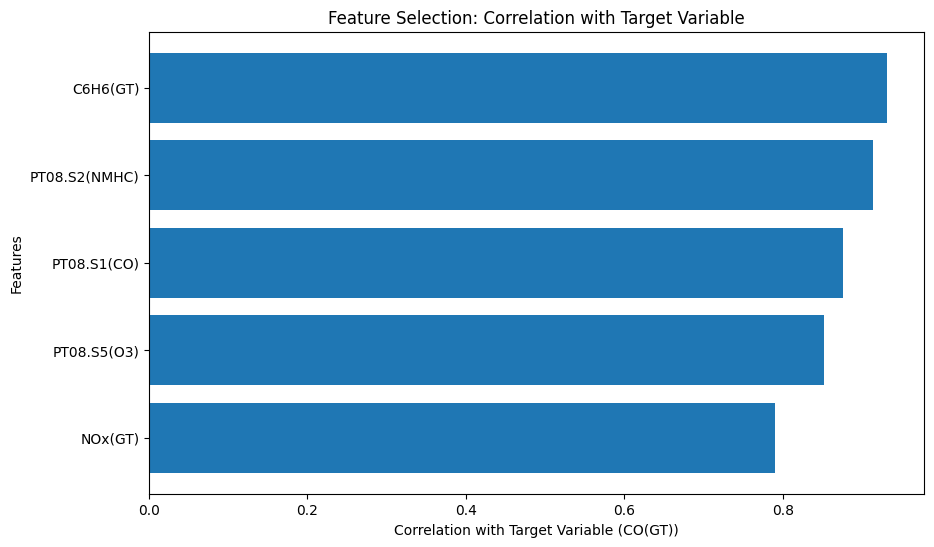


Multivariate Linear Regression Results:
Training MSE: 0.23934358987546422
Testing MSE: 0.24334775479864074


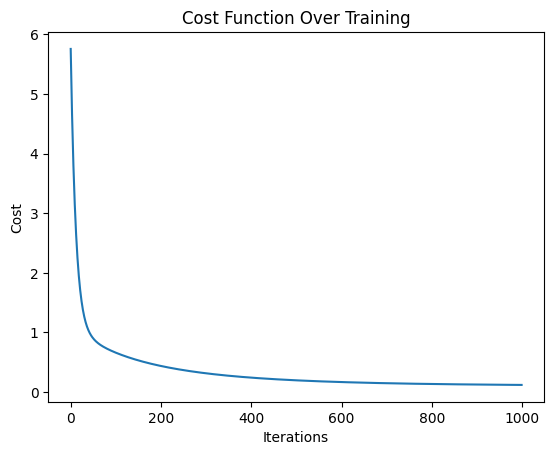

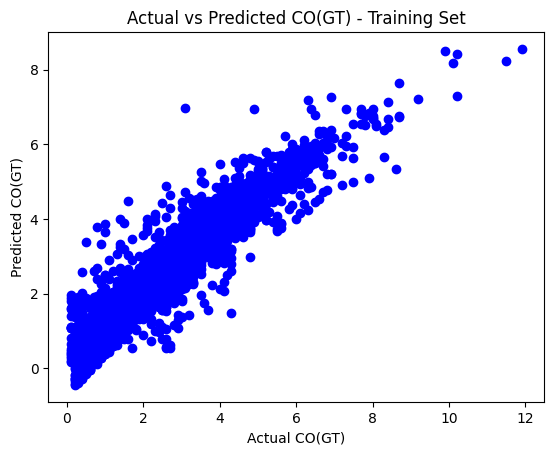

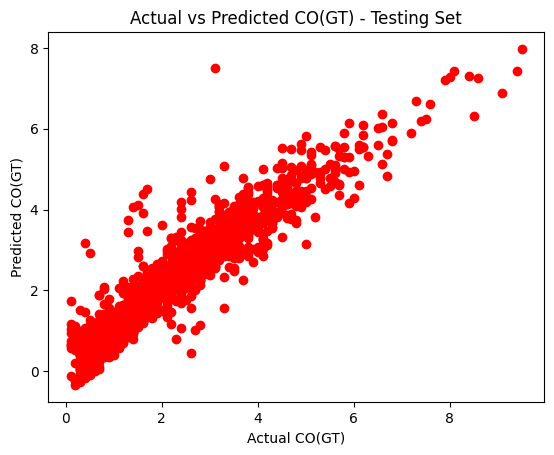

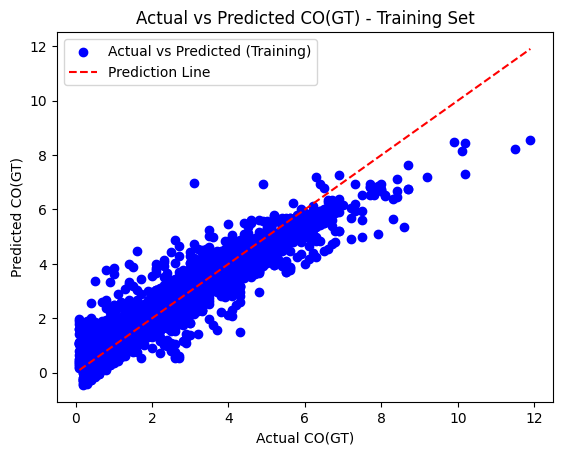

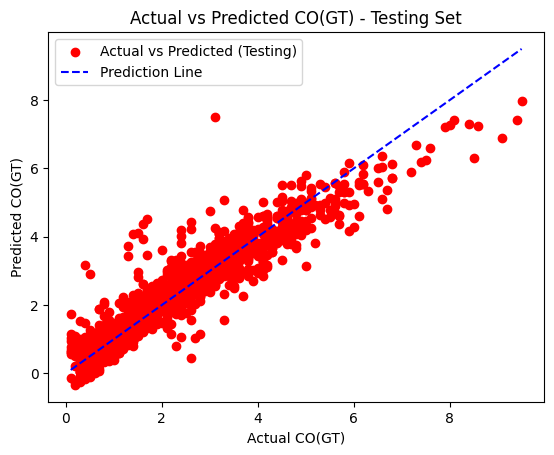

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Air Quality dataset
df = pd.read_csv("AirQualityUCI.csv", delimiter=";", decimal=",")
df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'], inplace=True)
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)

# Select relevant columns
columns_air = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
               'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df_air = df[columns_air]

# Select features and target variable
X = df_air.drop(columns=['CO(GT)'])
y = df_air['CO(GT)']

# Custom train-test split
def train_test_split_custom(X, y, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    m = len(y)
    indices = np.random.permutation(m)
    test_size = int(test_size * m)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.25, random_state=0)

# Manual Feature Scaling
def manual_feature_scaling(X_train, X_test):
    X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = manual_feature_scaling(X_train, X_test)

# Feature selection (select top features)
def feature_selection(X_train, y_train, X_test, num_features):
    # Use correlation with target variable to select top features
    feature_correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)
    top_features = feature_correlation.head(num_features).index.tolist()
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]
    return X_train_selected, X_test_selected, top_features

num_features_to_select = 5
X_train_selected, X_test_selected, top_features = feature_selection(X_train_scaled, y_train, X_test_scaled, num_features_to_select)
# Feature selection visualization
plt.figure(figsize=(10, 6))
plt.barh(top_features, [X_train_selected.corrwith(y_train)[feature] for feature in top_features])
plt.xlabel('Correlation with Target Variable (CO(GT))')
plt.ylabel('Features')
plt.title('Feature Selection: Correlation with Target Variable')
plt.gca().invert_yaxis()  # Invert y-axis to have highest correlation on top
plt.show()
# Implement Multivariate Linear Regression
class MultivariateLinearRegression:
    def __init__(self, alpha=0.01, num_iterations=1000, random_state=None):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.random_state = random_state
        self.theta = None
        self.cost_history = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.random.randn(X.shape[1])
        self.cost_history = []

        m = len(y)
        for i in range(self.num_iterations):
            h = np.dot(X, self.theta)
            error = h - y
            gradient = 1/m * np.dot(X.T, error)
            self.theta -= self.alpha * gradient
            cost = np.sum((error ** 2)) / (2 * m)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return np.dot(X, self.theta)

    def mean_squared_error(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

# Train the model
model = MultivariateLinearRegression(alpha=0.01, num_iterations=1000, random_state=0)
model.fit(X_train_selected, y_train)

# Predictions
train_predictions = model.predict(X_train_selected)
test_predictions = model.predict(X_test_selected)

# Evaluate Mean Squared Error
train_mse = model.mean_squared_error(X_train_selected, y_train)
test_mse = model.mean_squared_error(X_test_selected, y_test)

print("\nMultivariate Linear Regression Results:")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Plot Cost Function over Iterations
plt.plot(range(len(model.cost_history)), model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Training')
plt.show()

# Scatter plot for training set
plt.scatter(y_train, train_predictions, color='blue')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs Predicted CO(GT) - Training Set')
plt.show()

# Scatter plot for testing set
plt.scatter(y_test, test_predictions, color='red')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs Predicted CO(GT) - Testing Set')
plt.show()

# Scatter plot for training set
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs Predicted CO(GT) - Training Set')

# Plot prediction line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()

# Scatter plot for testing set
plt.scatter(y_test, test_predictions, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs Predicted CO(GT) - Testing Set')

# Plot prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()


### Logistic regression

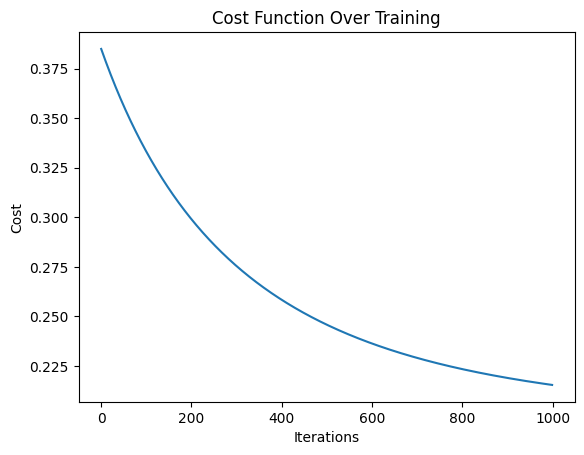


Logistic Regression with L2 Regularization Results:
Training Accuracy: 0.9131771033422974
Testing Accuracy: 0.9037463976945245


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Air Quality dataset
df = pd.read_csv("AirQualityUCI.csv", delimiter=";", decimal=",")
df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'], inplace=True)
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)

# Select relevant columns
columns_air = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
               'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df_air = df[columns_air]

# Select features and target variable
threshold = 2.0  # Example threshold
X = df_air.drop(columns=['CO(GT)'])
y = (df_air['CO(GT)'] > threshold).astype(int)  # Binary classification based on threshold

# Custom train-test split
def train_test_split_custom(X, y, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    m = len(y)
    indices = np.random.permutation(m)
    test_size = int(test_size * m)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.25, random_state=0)

# Manual Feature Scaling
def manual_feature_scaling(X_train, X_test):
    X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = manual_feature_scaling(X_train, X_test)

class LogisticRegressionL2:
    def __init__(self, alpha=0.01, lambda_=0.1, num_iterations=1000, random_state=None):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.num_iterations = num_iterations
        self.random_state = random_state
        self.theta = None
        self.J_history = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.theta))
        regularization = (self.lambda_ / (2 * m)) * np.sum(self.theta[1:]**2)
        J = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + regularization
        return J

    def gradient(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.theta))
        regularization = (self.lambda_ / m) * self.theta
        regularization[0] = 0  # No regularization for bias term
        grad = (1 / m) * X.T.dot(h - y) + regularization
        return grad

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.random.randn(X.shape[1])
        self.J_history = []

        for i in range(self.num_iterations):
            grad = self.gradient(X, y)
            self.theta -= self.alpha * grad
            cost = self.cost_function(X, y)
            self.J_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        prob = self.sigmoid(X.dot(self.theta))
        return (prob >= 0.5).astype(int)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Create and train the Logistic Regression model
model = LogisticRegressionL2(alpha=0.01, lambda_=0.1, num_iterations=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Training accuracy
train_accuracy = model.accuracy(X_train_scaled, y_train)

# Testing accuracy
test_accuracy = model.accuracy(X_test_scaled, y_test)

# Plot the cost function during training
plt.plot(range(len(model.J_history)), model.J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Training')
plt.show()

print("\nLogistic Regression with L2 Regularization Results:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


# Smarket

### Multivariate linear regression

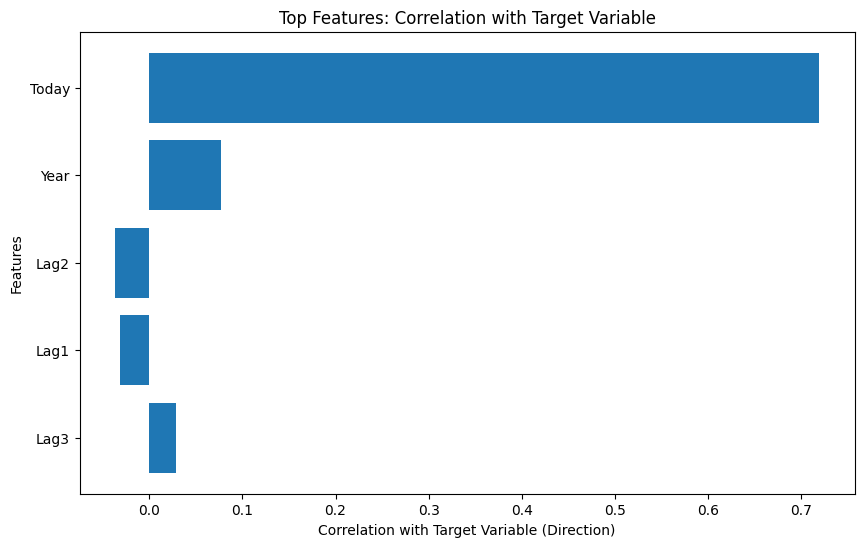


Multivariate Linear Regression Results:
Training MSE: 0.11902858432901123
Testing MSE: 0.10583819315548593


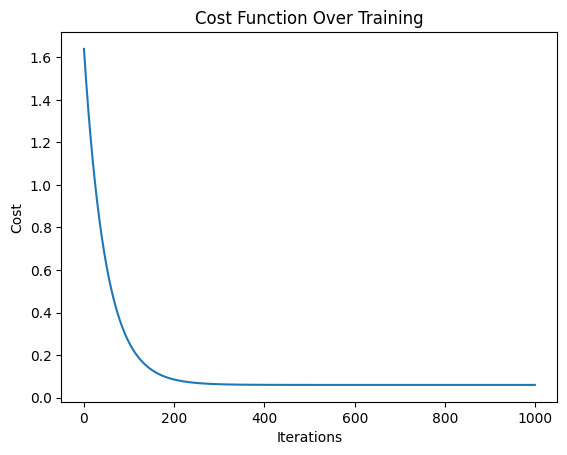

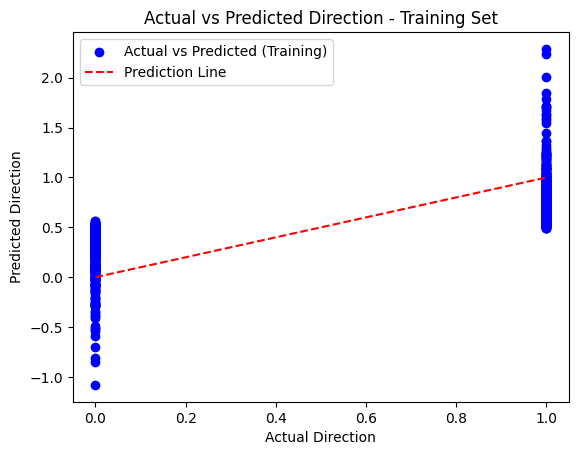

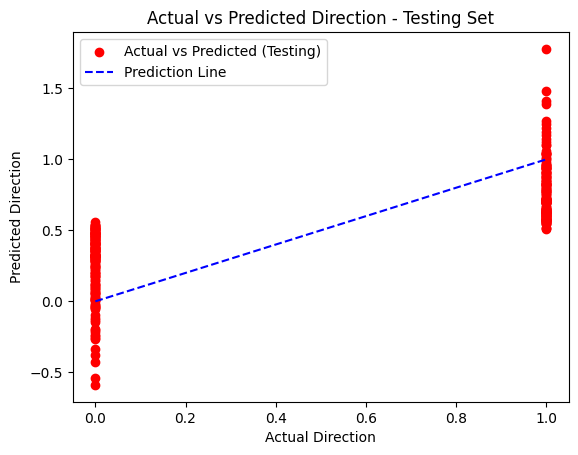

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the Smarket dataset
df = pd.read_csv("Smarket.csv")

# Create binary response variable
df['Direction'] = np.where(df['Direction'] == 'Up', 1, 0)

# Select features and target variable
X = df.drop(columns=['Direction'])
y = df['Direction']

# Custom train-test split
def train_test_split_custom(X, y, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    m = len(y)
    indices = np.random.permutation(m)
    test_size = int(test_size * m)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.25, random_state=0)

# Manual Feature Scaling
def manual_feature_scaling(X_train, X_test):
    X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = manual_feature_scaling(X_train, X_test)

# Feature selection (select top features)
def feature_selection(X_train, y_train, X_test, num_features):
    # Use correlation with target variable to select top features
    feature_correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)
    top_features = feature_correlation.head(num_features).index.tolist()
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]
    return X_train_selected, X_test_selected, top_features

# Implement Multivariate Linear Regression
class MultivariateLinearRegression:
    def __init__(self, alpha=0.01, num_iterations=1000, random_state=None):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.random_state = random_state
        self.theta = None
        self.cost_history = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.random.randn(X.shape[1])
        self.cost_history = []

        m = len(y)
        for i in range(self.num_iterations):
            h = np.dot(X, self.theta)
            error = h - y
            gradient = 1/m * np.dot(X.T, error)
            self.theta -= self.alpha * gradient
            cost = np.sum((error ** 2)) / (2 * m)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return np.dot(X, self.theta)

    def mean_squared_error(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

num_features_to_select = 5
X_train_selected, X_test_selected, top_features = feature_selection(X_train_scaled, y_train, X_test_scaled, num_features_to_select)

# Plot top feature graph
plt.figure(figsize=(10, 6))
plt.barh(top_features, [X_train_selected.corrwith(y_train)[feature] for feature in top_features])
plt.xlabel('Correlation with Target Variable (Direction)')
plt.ylabel('Features')
plt.title('Top Features: Correlation with Target Variable')
plt.gca().invert_yaxis()  # Invert y-axis to have highest correlation on top
plt.show()

# Train the model
model = MultivariateLinearRegression(alpha=0.01, num_iterations=1000, random_state=42)
model.fit(X_train_selected, y_train)

# Predictions
train_predictions = model.predict(X_train_selected)
test_predictions = model.predict(X_test_selected)

# Evaluate Mean Squared Error
train_mse = model.mean_squared_error(X_train_selected, y_train)
test_mse = model.mean_squared_error(X_test_selected, y_test)

print("\nMultivariate Linear Regression Results:")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Plot Cost Function over Iterations
plt.plot(range(len(model.cost_history)), model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Training')
plt.show()

# Scatter plot for training set
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Direction')
plt.ylabel('Predicted Direction')
plt.title('Actual vs Predicted Direction - Training Set')

# Plot prediction line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()

# Scatter plot for testing set
plt.scatter(y_test, test_predictions, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual Direction')
plt.ylabel('Predicted Direction')
plt.title('Actual vs Predicted Direction - Testing Set')

# Plot prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()


### Logistic regression


Logistic Regression with L2 Regularization Results:
Training Accuracy: 0.8336886993603412
Testing Accuracy: 0.8461538461538461


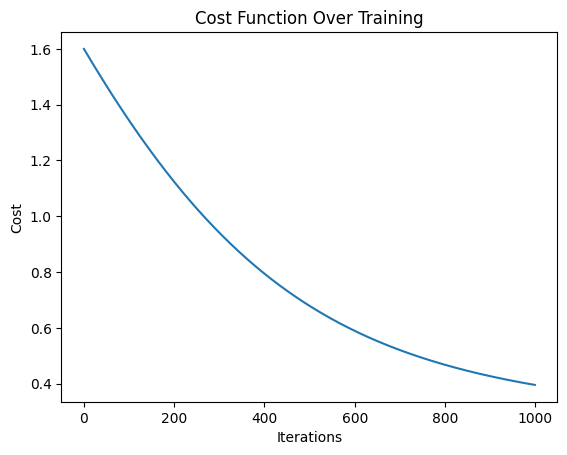

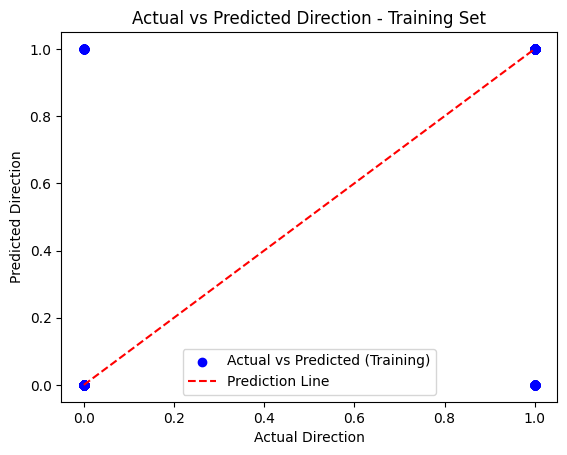

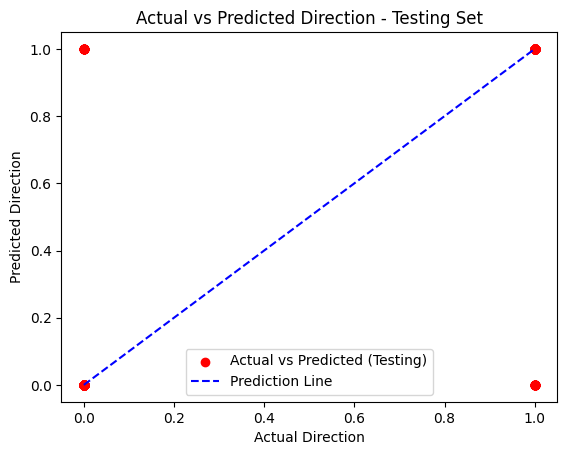

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Smarket dataset
df = pd.read_csv("Smarket.csv")

# Create binary response variable
df['Direction'] = np.where(df['Direction'] == 'Up', 1, 0)

# Select features and target variable
X = df.drop(columns=['Direction'])
y = df['Direction']

# Custom train-test split
def train_test_split_custom(X, y, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    m = len(y)
    indices = np.random.permutation(m)
    test_size = int(test_size * m)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.25, random_state=0)

# Manual Feature Scaling
def manual_feature_scaling(X_train, X_test):
    X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = manual_feature_scaling(X_train, X_test)

# Logistic Regression with L2 Regularization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_cost(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    return J

def logistic_regression_gradient(X, y, theta, alpha, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    regularization_term = (lambda_ / m) * theta
    regularization_term[0] = 0  # No regularization for bias term
    grad = (1 / m) * X.T.dot(h - y) + regularization_term
    return grad

def logistic_regression_gradient_descent(X, y, theta, alpha, lambda_, num_iterations):
    m = len(y)
    J_history = []

    for i in range(num_iterations):
        grad = logistic_regression_gradient(X, y, theta, alpha, lambda_)
        theta -= alpha * grad
        J_history.append(logistic_regression_cost(X, y, theta, lambda_))

    return theta, J_history

# Initialize theta (weights) and hyperparameters
theta_initial = np.random.randn(X_train_scaled.shape[1])
alpha = 0.01
lambda_ = 0.1
num_iterations = 1000

# Train the model
theta_final, J_history = logistic_regression_gradient_descent(X_train_scaled, y_train, theta_initial, alpha, lambda_, num_iterations)

# Predictions
def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    return (prob >= 0.5).astype(int)

# Training accuracy
train_predictions = predict(X_train_scaled, theta_final)
train_accuracy = np.mean(train_predictions == y_train)

# Testing accuracy
test_predictions = predict(X_test_scaled, theta_final)
test_accuracy = np.mean(test_predictions == y_test)

print("\nLogistic Regression with L2 Regularization Results:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot Cost Function over Iterations
plt.plot(range(num_iterations), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Training')
plt.show()

# Scatter plot for training set
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Direction')
plt.ylabel('Predicted Direction')
plt.title('Actual vs Predicted Direction - Training Set')

# Plot prediction line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()

# Scatter plot for testing set
plt.scatter(y_test, test_predictions, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual Direction')
plt.ylabel('Predicted Direction')
plt.title('Actual vs Predicted Direction - Testing Set')

# Plot prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Prediction Line')

plt.legend()
plt.show()
